In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## What is Exploratory Data Analysis(EDA)?
If we want to explain EDA in simple terms, it means trying to understand the given data much better, so that we can make some sense out of it. Some insight into data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
1. EDA is applied to investigate the data and summarize the key insights.
2. It will give you the basic understanding of your data, it’s distribution, null values and much more.
3. You can either explore data using graphs or through some python functions.

### Basically EDA has three types
1. Univariate analysis  it means Single varibal without consider relationship with other variable
2. Bivariate analysis    It meanns two variabals together and look at the interaction/Relationship between them.
3. Multivariate analysis Multivarible relationship with one another

## Loading data set to pd dataframe

In [2]:
df = pd.read_csv('/kaggle/input/loan-dataset/loan.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


As you see above we have some Unnamed columns which are not part or not import for furthe analysis like Unammed:0 and 0.1 so we have to drop it.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [4]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


### Formating of date and time column

In [6]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [7]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Null values 

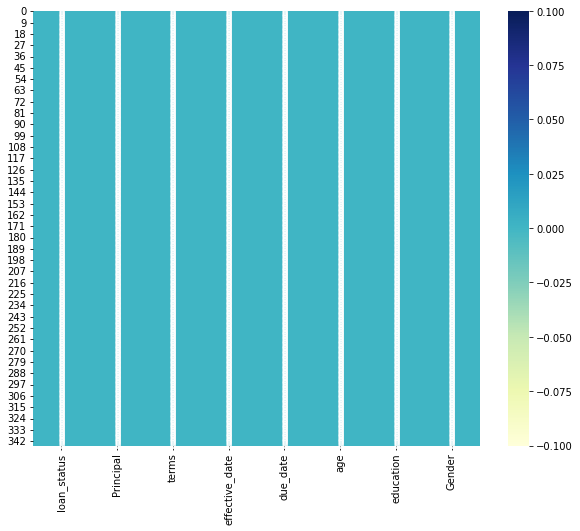

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='YlGnBu',annot=True);

The graph shows that we have not a single null value so we will also use this with python function isnull with sum.

In [9]:
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

The color of heatmap is full so it means that there is no any null value found on dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


In [11]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [12]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

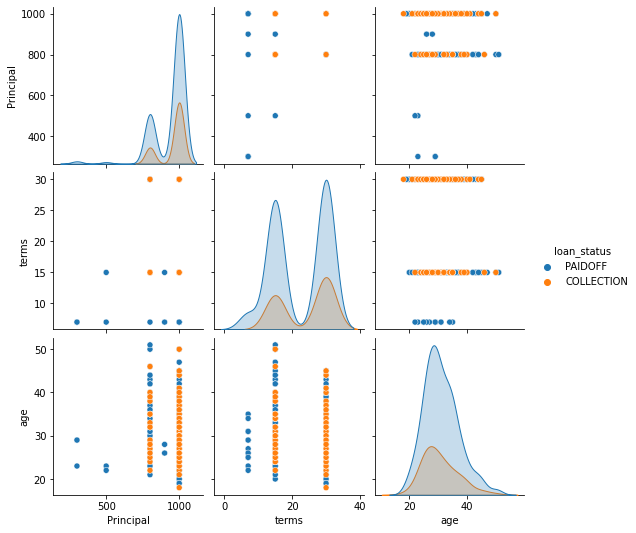

In [13]:
plt.figure(figsize=(6,4))
sns.pairplot(df, hue='loan_status');

In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Let's have see it visually

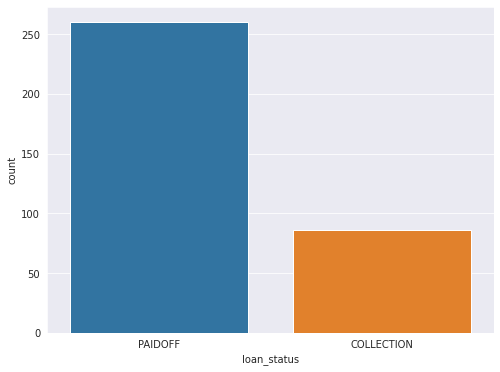

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=df);

<Figure size 1080x720 with 0 Axes>

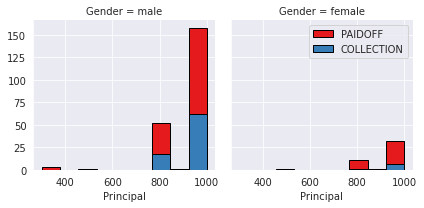

In [16]:
plt.figure(figsize=(15,10))
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()

plt.show();

<Figure size 720x576 with 0 Axes>

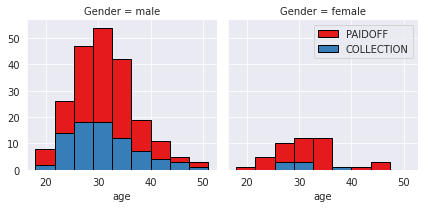

In [17]:
plt.figure(figsize=(10,8))
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show();

In [18]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [19]:
df.corr()

,Principal,terms,age
Principal,1.000000,0.521876,-0.060893
terms,0.521876,1.000000,-0.064762
age,-0.060893,-0.064762,1.000000


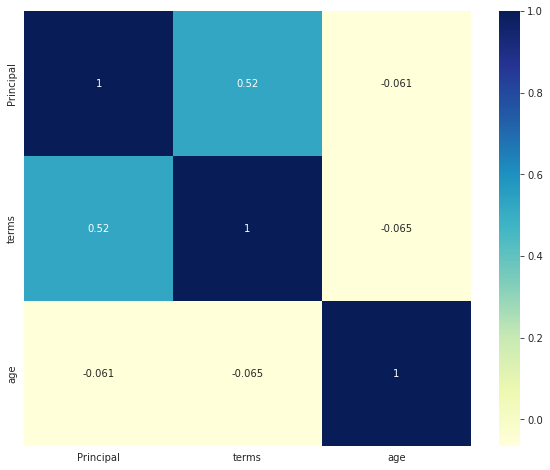

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True);

In [21]:
#let see the education columns
edu = df['education'].value_counts()
edu

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

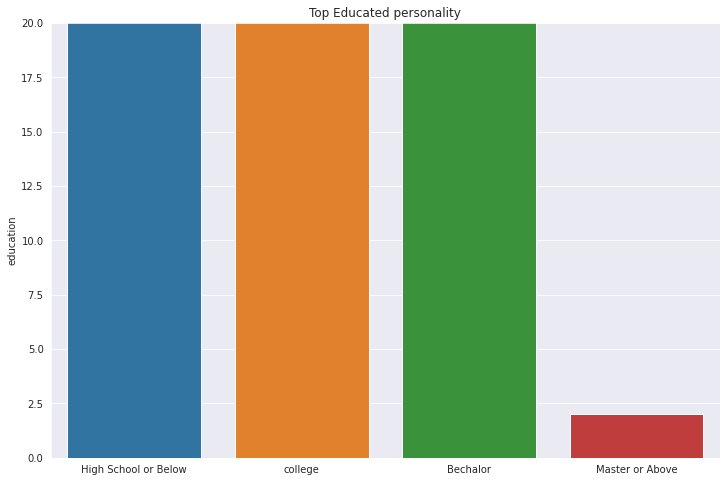

In [22]:
top_edu_ins = df.education.value_counts()
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top Educated personality")

sns.barplot( x = top_edu_ins.index, y = top_edu_ins, orient='v');
plt.show()

Dealing with loan personality are mostly belong to high school or below and college some bechalor but little are belongs to Master and above.

## Gender 
- How many male or female are there who particpated


In [23]:
genders = df['Gender'].value_counts()
genders

male      294
female     52
Name: Gender, dtype: int64

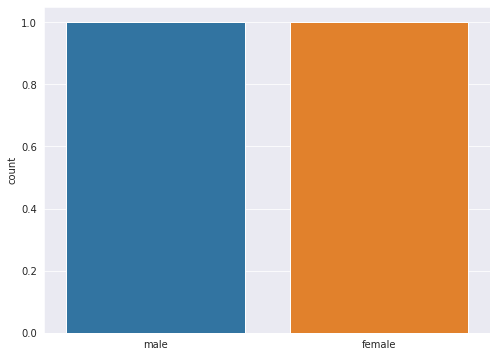

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x=genders.index)
plt.show();

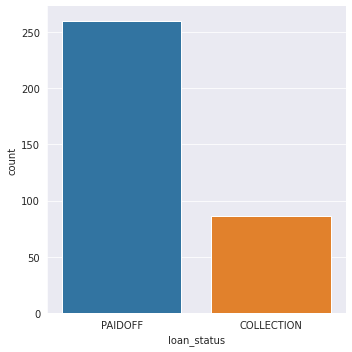

In [25]:
g = sns.catplot(x="loan_status", data=df, kind="count")

In [26]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')